In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import statsmodels
from IPython.display import clear_output

In [2]:
df = pd.read_csv('data3a.csv')
df

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C
...,...,...,...
95,8,9.15,T
96,6,8.52,T
97,8,10.24,T
98,7,10.86,T


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       100 non-null    int64  
 1   x       100 non-null    float64
 2   f       100 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


In [4]:
df.describe()

,y,x
count,100.000000,100.000000
mean,7.830000,10.089100
std,2.624881,1.008049
min,2.000000,7.190000
25%,6.000000,9.427500
50%,8.000000,10.155000
75%,10.000000,10.685000
max,15.000000,12.400000


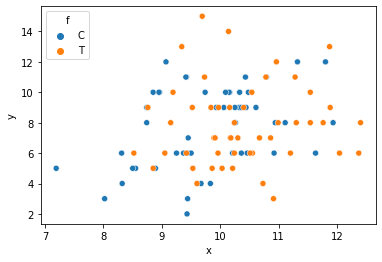

In [5]:
sns.scatterplot(data=df, x='x', y='y', hue='f')
plt.show()

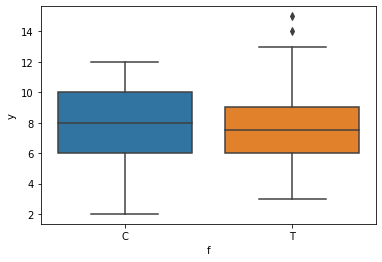

In [6]:
sns.boxplot(data=df, x='f', y='y', whis=1.5)
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Wed, 15 Mar 2023   Deviance:                       84.993
Time:                        06:41:04   Pearson chi2:                     83.8
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04414
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2917      0.364      3.552      0.0

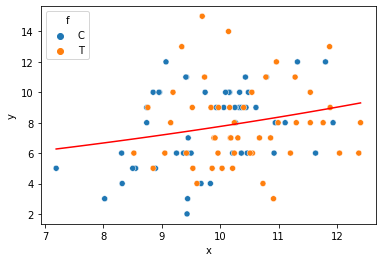

In [7]:
# 施肥効果を無視した場合
X = df['x']
X = sm.add_constant(X)
y = df['y']

model = sm.GLM(y, X, family=sm.families.Poisson())
result = model.fit()

print(result.summary())

xx = np.linspace(df['x'].min(), df['x'].max(), 100)
xx = sm.add_constant(xx)
yy = result.predict(xx)

sns.scatterplot(data=df, x='x', y='y', hue='f')
plt.plot(xx[:, 1], yy, color='r')
plt.show()

In [8]:
# 説明変数が因子型の統計モデル
df[['C', 'T']] = pd.get_dummies(df['f'])

X = df[['T']]
X = sm.add_constant(X)
y = df['y']

model = sm.GLM(y, X, family=sm.families.Poisson())
result = model.fit()

print(result.summary())

print('f=Cの時の平均種子数λ: {:.2f}'.format(np.exp(result.params["const"])))
print('f=Tの時の平均種子数λ: {:.2f}'.format(np.exp(result.params["const"] + result.params["T"])))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Wed, 15 Mar 2023   Deviance:                       89.475
Time:                        06:41:04   Pearson chi2:                     87.1
No. Iterations:                     4   Pseudo R-squ. (CS):          0.0003192
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0516      0.051     40.463      0.0

In [9]:
# 説明変数が数値型＋因子型の統計モデル
X = df[['x', 'T']]
X = sm.add_constant(X)
y = df['y']

model = sm.GLM(y, X, family=sm.families.Poisson())
result = model.fit()

print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Wed, 15 Mar 2023   Deviance:                       84.808
Time:                        06:41:04   Pearson chi2:                     83.8
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04590
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2631      0.370      3.417      0.0

In [10]:
sm.families.family.Poisson.links

[statsmodels.genmod.families.links.Log,
 statsmodels.genmod.families.links.identity,
 statsmodels.genmod.families.links.sqrt]

In [11]:
# 恒等リンク関数
X = df[['x', 'T']]
X = sm.add_constant(X)
y = df['y']

model = sm.GLM(y, X, family=sm.families.Poisson(link=statsmodels.genmod.families.links.identity()))
result = model.fit()

clear_output()

In [12]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:               identity   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.16
Date:                Wed, 15 Mar 2023   Deviance:                       84.538
Time:                        06:41:04   Pearson chi2:                     83.6
No. Iterations:                     5   Pseudo R-squ. (CS):            0.04847
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2671      2.843      0.446      0.6